#### Sunny Mei & Miguel Dominguez
#### CSC 59970
#### Data Science
#### Prof. Etemadpour
#### Date: 10/03/17
#### Assigment #3 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

In [2]:
#Get cars dataframe
cars = pd.read_csv('cars.csv', sep=';')
cars.drop(0,axis=0, inplace=True)

In [4]:
cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,US
3,Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,US
5,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US


In [5]:
from sklearn.preprocessing import LabelEncoder

X = cars[['MPG', 'Cylinders','Displacement','Horsepower','Weight','Acceleration','Model']].values
y = cars['Origin'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1  ##The origin seem like a good classifer
X = np.asfarray(X, dtype='float')

In [6]:
#Build a dictionary with the feature names.
feature_dict = {i:label for i,label in zip(range(7),
                  ('MPG','Cylinders','Displacement','HorsePower', 'Weight' ,'Acceleration','Model'))}

#Labels for Classes
label_dict = {1: 'US', 2: 'Japan', 3:'Europe'}

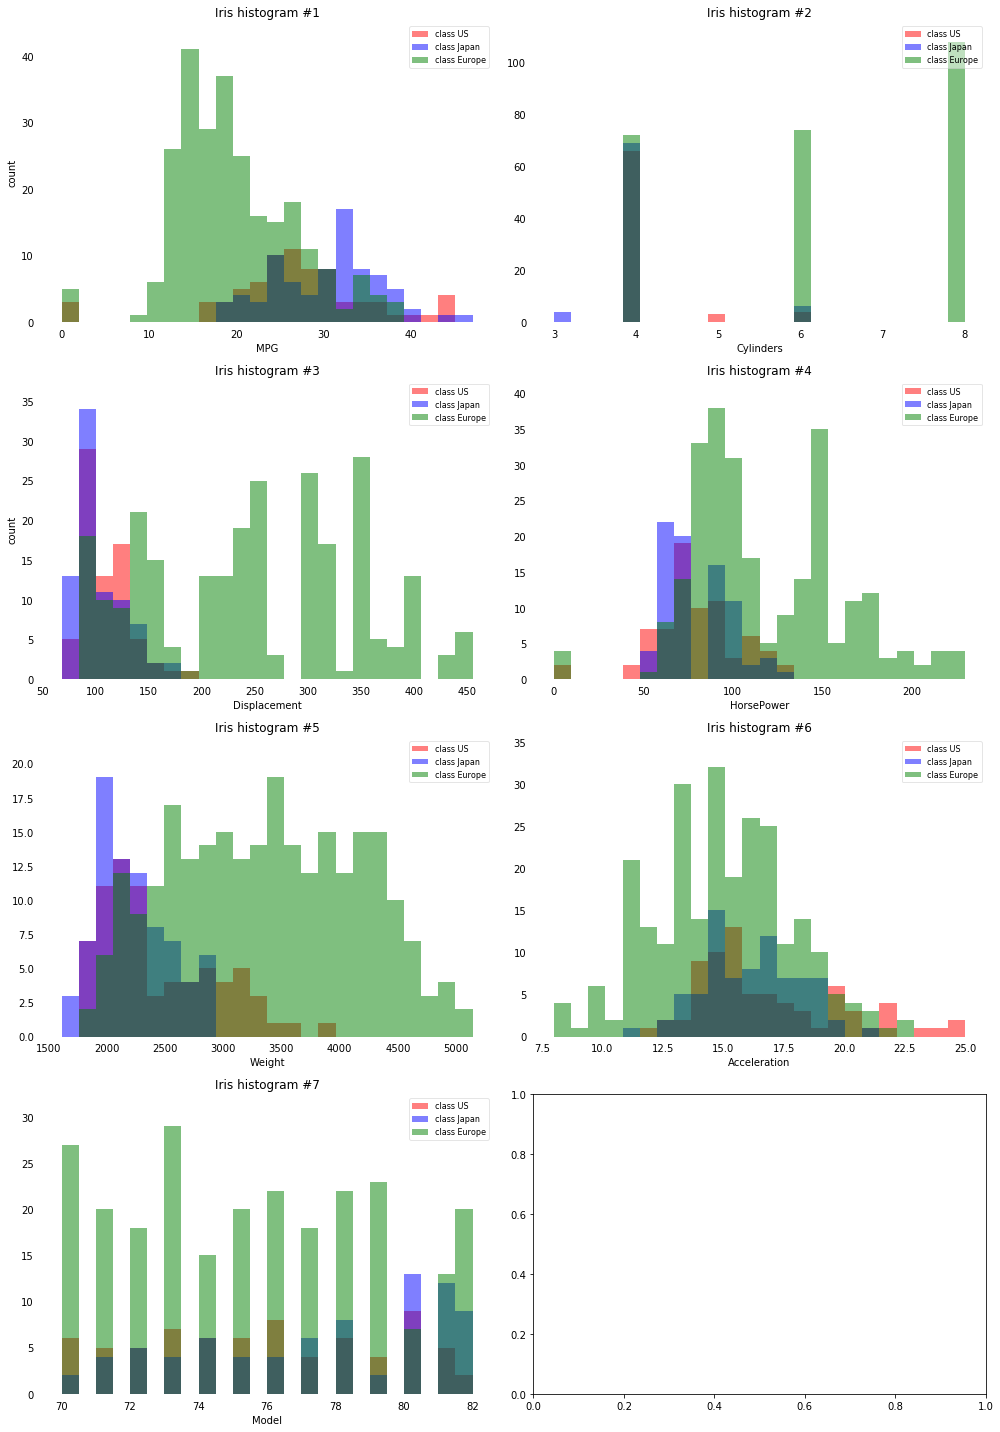

In [30]:
from matplotlib import pyplot as plt
import numpy as np
import math

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14,20))

for ax,cnt in zip(axes.ravel(), range(7)):  

    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    # plottling the histograms
    for lab,col in zip(range(1,4), ('red','blue','green')):
        ax.hist(X[y==lab, cnt],
                   color=col,
                   label='class %s' %label_dict[lab],
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Iris histogram #%s' %str(cnt+1))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()       

plt.show()

# Step 1: Computing the d-dimensional mean vectors

In [8]:
np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))
mean_vectors

Mean Vector class 1: [   26.7452     4.1507   109.4658    78.7808  2431.4932    16.8219
    75.7397]

Mean Vector class 2: [   30.4506     4.1013   102.7089    79.8354  2221.2278    16.1722
    77.443 ]

Mean Vector class 3: [   19.6882     6.2835   247.935    118.0118  3372.7008    14.9425    75.5   ]



[array([   26.7452,     4.1507,   109.4658,    78.7808,  2431.4932,
           16.8219,    75.7397]),
 array([   30.4506,     4.1013,   102.7089,    79.8354,  2221.2278,
           16.1722,    77.443 ]),
 array([   19.6882,     6.2835,   247.935 ,   118.0118,  3372.7008,
           14.9425,    75.5   ])]

In [8]:
#list mean_vectors is a 3 x 7 vector where entry (i,j) is the mean for the jth feature for the ith class

# Step 2: Computing the Scatter Matrices

# Within-class scatter matrix

In [9]:
#Within class scatter matrix
S_W = np.zeros((7,7))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((7,7))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(7,1), mv.reshape(7,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[  2.0395e+04  -2.4347e+03  -1.5063e+05  -6.7298e+04  -1.3428e+06
    2.8236e+03   6.2775e+03]
 [ -2.4347e+03   7.4412e+02   4.0093e+04   1.5200e+04   3.0978e+05
   -7.0038e+02  -7.0368e+02]
 [ -1.5063e+05   4.0093e+04   2.5398e+06   9.8249e+05   1.9325e+07
   -4.5821e+04  -4.5180e+04]
 [ -6.7298e+04   1.5200e+04   9.8249e+05   5.2264e+05   7.8315e+06
   -2.5681e+04  -2.1764e+04]
 [ -1.3428e+06   3.0978e+05   1.9325e+07   7.8315e+06   1.8394e+08
   -2.6477e+05  -2.7961e+05]
 [  2.8236e+03  -7.0038e+02  -4.5821e+04  -2.5681e+04  -2.6477e+05
    2.9408e+03   1.1624e+03]
 [  6.2775e+03  -7.0368e+02  -4.5180e+04  -2.1764e+04  -2.7961e+05
    1.1624e+03   5.4610e+03]]


# Between-class scatter matrix

In [10]:
#Between-class scatter matrix
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((7,7))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(7,1) # make column vector
    overall_mean = overall_mean.reshape(7,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[  8.1942e+03  -1.8507e+03  -1.2223e+05  -3.2895e+04  -9.2690e+05
    1.2256e+03   1.2005e+03]
 [ -1.8507e+03   4.4313e+02   2.9155e+04   7.9379e+03   2.1601e+05
   -3.1522e+02  -2.3411e+02]
 [ -1.2223e+05   2.9155e+04   1.9187e+06   5.2201e+05   1.4237e+07
   -2.0649e+04  -1.5626e+04]
 [ -3.2895e+04   7.9379e+03   5.2201e+05   1.4234e+05   3.8558e+06
   -5.6971e+03  -4.0701e+03]
 [ -9.2690e+05   2.1601e+05   1.4237e+07   3.8558e+06   1.0662e+08
   -1.4882e+05  -1.2597e+05]
 [  1.2256e+03  -3.1522e+02  -2.0649e+04  -5.6971e+03  -1.4882e+05
    2.4204e+02   1.2294e+02]
 [  1.2005e+03  -2.3411e+02  -1.5626e+04  -4.0701e+03  -1.2597e+05
    1.2294e+02   2.3043e+02]]


# Step 3: Solving the generalized eigenvalue problem for the matrix S−1WSB

In [11]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(7,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[ 0.2526]
 [ 0.8895]
 [-0.0927]
 [ 0.0823]
 [ 0.0017]
 [-0.0856]
 [-0.3497]]
Eigenvalue 1: 1.04e+00

Eigenvector 2: 
[[ 0.1316]
 [ 0.8964]
 [ 0.0236]
 [ 0.0516]
 [-0.0053]
 [-0.0306]
 [ 0.4183]]
Eigenvalue 2: 7.64e-02

Eigenvector 3: 
[[ 0.0537]
 [ 0.9898]
 [-0.0272]
 [ 0.0075]
 [ 0.0016]
 [-0.119 ]
 [-0.0488]]
Eigenvalue 3: 2.42e-15

Eigenvector 4: 
[[ -1.3092e-01]
 [ -2.2191e-01]
 [ -1.8598e-03]
 [  3.9819e-02]
 [ -1.2595e-04]
 [  8.0237e-01]
 [  5.3687e-01]]
Eigenvalue 4: -1.20e-16

Eigenvector 5: 
[[  1.1620e-01]
 [  1.7170e-01]
 [ -4.8650e-03]
 [ -1.3856e-02]
 [  3.1894e-05]
 [ -8.0170e-01]
 [ -5.6042e-01]]
Eigenvalue 5: -5.32e-17

Eigenvector 6: 
[[ -3.2056e-02]
 [  9.6917e-01]
 [ -2.5717e-03]
 [ -3.0465e-02]
 [ -9.0530e-04]
 [ -5.5227e-02]
 [ -2.6307e-02]]
Eigenvalue 6: 4.72e-16

Eigenvector 7: 
[[ -3.2056e-02]
 [  9.6917e-01]
 [ -2.5717e-03]
 [ -3.0465e-02]
 [ -9.0530e-04]
 [ -5.5227e-02]
 [ -2.6307e-02]]
Eigenvalue 7: 4.72e-16


In [12]:
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(7,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')##Error check to make sure we have the right eigenvalues/vectors

ok


# Step 4: Selecting linear discriminants for the new feature subspace

In [13]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

1.03958087968
0.0764048551857
2.42366375664e-15
5.89540130674e-16
5.89540130674e-16
1.19769960304e-16
5.31800815137e-17


In [14]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 93.15%
eigenvalue 2: 6.85%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%
eigenvalue 5: 0.00%
eigenvalue 6: 0.00%
eigenvalue 7: 0.00%


# Choosing k eigenvectors with the largest eigenvalues

In [15]:
W = np.hstack((eig_pairs[0][1].reshape(7,1), eig_pairs[1][1].reshape(7,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[ 0.2526  0.1316]
 [ 0.8895  0.8964]
 [-0.0927  0.0236]
 [ 0.0823  0.0516]
 [ 0.0017 -0.0053]
 [-0.0856 -0.0306]
 [-0.3497  0.4183]]


# Step 5: Transforming the samples onto the new subspace

In [16]:
#In the following section we will do the matrix multiplication of X and Y
#

X_lda = X.dot(W)
X_lda.shape
assert X_lda.shape == (406,2), "The matrix is not 406x2 dimensional."

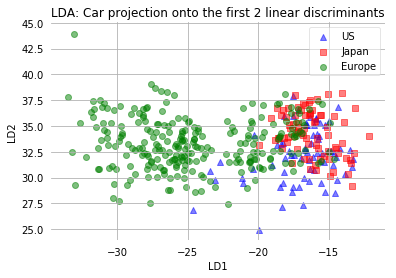

In [17]:
def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Car projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

# A comparison of PCA and LDA

In [18]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
X_pca = sklearn_pca.fit_transform(X)

def plot_pca():

    ax = plt.subplot(111)

    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_pca[:,0][y == label],
                y=X_pca[:,1][y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('PC1')
    plt.ylabel('PC2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('PCA: Car projection onto the first 2 principal components')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.tight_layout
    plt.grid()

    plt.show()

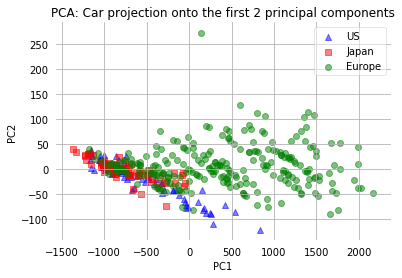

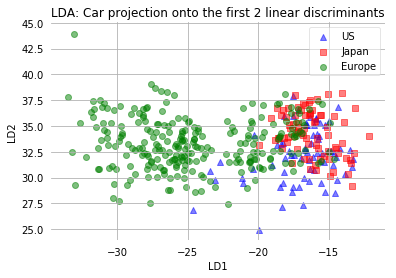

In [19]:
plot_pca()
plot_step_lda()

# LDA via scikit-learn

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

In [21]:
def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label] * -1,
                    y=X[:,1][y == label] * 1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

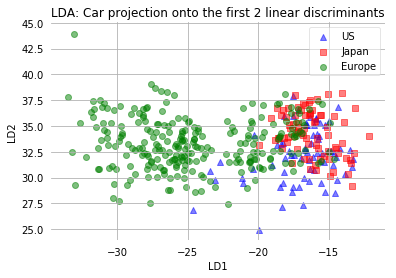

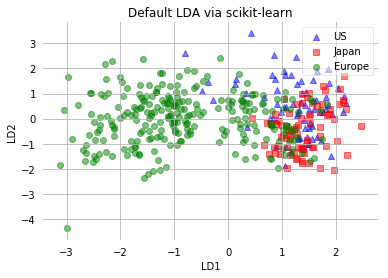

In [22]:
plot_step_lda()
plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

In [23]:
X = cars[['MPG', 'Cylinders','Displacement','Horsepower','Weight','Acceleration','Model']].values
y = cars['Origin'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1  ##The origin seem like a good classifer
X = np.asfarray(X, dtype='float')

In [24]:
X_cent = X - X.mean(axis=0)
X_std = X_cent / X.std(axis=0)

# Functions for LDA

In [25]:
import numpy as np

def comp_mean_vectors(X, y):
    class_labels = np.unique(y)
    n_classes = class_labels.shape[0]
    mean_vectors = []
    for cl in class_labels:
        mean_vectors.append(np.mean(X[y==cl], axis=0))
    return mean_vectors

def scatter_within(X, y):
    class_labels = np.unique(y)
    n_classes = class_labels.shape[0]
    n_features = X.shape[1]
    mean_vectors = comp_mean_vectors(X, y)
    S_W = np.zeros((n_features, n_features))
    for cl, mv in zip(class_labels, mean_vectors):
        class_sc_mat = np.zeros((n_features, n_features))                 
        for row in X[y == cl]:
            row, mv = row.reshape(n_features, 1), mv.reshape(n_features, 1)
            class_sc_mat += (row-mv).dot((row-mv).T)
        S_W += class_sc_mat                           
    return S_W

def scatter_between(X, y):
    overall_mean = np.mean(X, axis=0)
    n_features = X.shape[1]
    mean_vectors = comp_mean_vectors(X, y)    
    S_B = np.zeros((n_features, n_features))
    for i, mean_vec in enumerate(mean_vectors):  
        n = X[y==i+1,:].shape[0]
        mean_vec = mean_vec.reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    return S_B

def get_components(eig_vals, eig_vecs, n_comp=2):
    n_features = X.shape[1]
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
    eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
    W = np.hstack([eig_pairs[i][1].reshape(7, 1) for i in range(0, n_comp)])
    return W

# Print eigenvalues and eigenvectors and trasnformation matrxi

In [26]:
S_W, S_B = scatter_within(X, y), scatter_between(X, y)
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
W = get_components(eig_vals, eig_vecs, n_comp=2)
print('EigVals: %s\n\nEigVecs: %s' % (eig_vals, eig_vecs))
print('\nW: %s' % W)

EigVals: [  1.0396e+00 +0.0000e+00j   7.6405e-02 +0.0000e+00j
   2.4237e-15 +0.0000e+00j  -1.1977e-16 +0.0000e+00j
  -5.3180e-17 +0.0000e+00j   4.7246e-16 +3.5261e-16j
   4.7246e-16 -3.5261e-16j]

EigVecs: [[  2.5258e-01 +0.0000e+00j   1.3161e-01 +0.0000e+00j
    5.3653e-02 +0.0000e+00j  -1.3092e-01 +0.0000e+00j
    1.1620e-01 +0.0000e+00j  -3.2056e-02 -1.0141e-01j
   -3.2056e-02 +1.0141e-01j]
 [  8.8953e-01 +0.0000e+00j   8.9638e-01 +0.0000e+00j
    9.8984e-01 +0.0000e+00j  -2.2191e-01 +0.0000e+00j
    1.7170e-01 +0.0000e+00j   9.6917e-01 +0.0000e+00j
    9.6917e-01 -0.0000e+00j]
 [ -9.2671e-02 +0.0000e+00j   2.3615e-02 +0.0000e+00j
   -2.7199e-02 +0.0000e+00j  -1.8598e-03 +0.0000e+00j
   -4.8650e-03 +0.0000e+00j  -2.5717e-03 -4.3222e-03j
   -2.5717e-03 +4.3222e-03j]
 [  8.2260e-02 +0.0000e+00j   5.1552e-02 +0.0000e+00j
    7.5303e-03 +0.0000e+00j   3.9819e-02 +0.0000e+00j
   -1.3856e-02 +0.0000e+00j  -3.0465e-02 -9.6591e-03j
   -3.0465e-02 +9.6591e-03j]
 [  1.7206e-03 +0.0000e+00j  -

C:\Users\billy\Anaconda3\lib\site-packages\numpy\core\numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


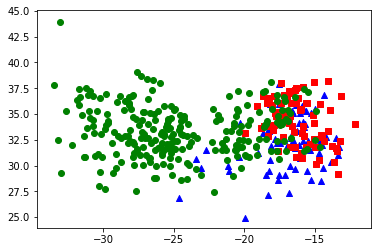

In [27]:
X_lda = X.dot(W)
for label,marker,color in zip(
        np.unique(y),('^', 's', 'o'),('blue', 'red', 'green')):
    plt.scatter(X_lda[y==label, 0], X_lda[y==label, 1],
                color=color, marker=marker)
plt.show()

In [28]:
S_W, S_B = scatter_within(X_std, y), scatter_between(X_std, y)
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
W_std = get_components(eig_vals, eig_vecs, n_comp=2)
print('EigVals: %s\n\nEigVecs: %s' % (eig_vals, eig_vecs))
print('\nW: %s' % W_std)

EigVals: [  1.0396e+00 +0.0000e+00j   7.6405e-02 +0.0000e+00j
  -6.2613e-16 +2.8397e-16j  -6.2613e-16 -2.8397e-16j
   5.1026e-16 +0.0000e+00j   4.6498e-17 +1.7536e-17j
   4.6498e-17 -1.7536e-17j]

EigVecs: [[-0.1967+0.j      0.1820+0.j     -0.3175-0.0308j -0.3175+0.0308j
  -0.4545+0.j      0.2938+0.1453j  0.2938-0.1453j]
 [-0.1412+0.j      0.2525+0.j     -0.2968+0.108j  -0.2968-0.108j
   0.5317+0.j     -0.0306+0.0427j -0.0306-0.0427j]
 [ 0.9013+0.j      0.4077+0.j      0.5063-0.2782j  0.5063+0.2782j
  -0.1082+0.j      0.1176+0.1344j  0.1176-0.1344j]
 [-0.3090+0.j      0.3437+0.j      0.1707+0.1691j  0.1707-0.1691j
  -0.5439+0.j      0.2822-0.0669j  0.2822+0.0669j]
 [-0.1351+0.j     -0.7429+0.j     -0.6318+0.j     -0.6318-0.j     -0.3134+0.j
  -0.3861+0.059j  -0.3861-0.059j ]
 [ 0.0222+0.j     -0.0141+0.j      0.0399-0.0601j  0.0399+0.0601j
   0.0084+0.j     -0.3608+0.163j  -0.3608-0.163j ]
 [ 0.1215+0.j      0.2581+0.j      0.0265-0.043j   0.0265+0.043j
   0.3238+0.j     -0.6816+0.j   

C:\Users\billy\Anaconda3\lib\site-packages\numpy\core\numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


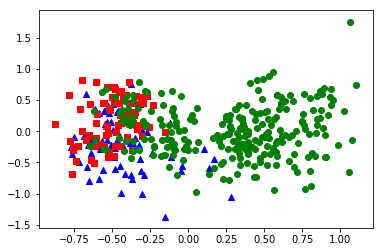

In [29]:
X_std_lda = X_std.dot(W_std)
X_std_lda[:, 1] = X_std_lda[:, 1]
for label,marker,color in zip(
        np.unique(y),('^', 's', 'o'),('blue', 'red', 'green')):
    plt.scatter(X_std_lda[y==label, 0], X_std_lda[y==label, 1],
                color=color, marker=marker)
plt.show()